In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hori_motion_blur(img,k):
    kernel = np.zeros((k,k))
    kernel[int((k - 1)/2), :] = np.ones(k) 
    kernel /= k #normalise the kernel
    
    #take 2D convolution
    output = cv2.filter2D(img,-1,kernel)
    return output

def dog(img, k, sigma, p, size=(0, 0)):
    img1 = cv2.GaussianBlur(img, size, sigma)
    img2 = cv2.GaussianBlur(img, size, sigma * k)

    return ((1 + p) * img1) - p * img2

def thresholding(img, epsilon, phi):
    img = img / 255
    mask = img >= epsilon
    img[mask] = 1
    img[~mask] = 1 + np.tanh(phi * (img[~mask] - epsilon))
    img = img * 255
    return img

def xdog(img, k, sigma, p, epsilon, phi):
    dimg = dog(img, k, sigma, p)
    thresh = thresholding(dimg, epsilon, phi)
    thresh = np.stack((thresh, thresh, thresh), axis=2).astype(np.uint8)
    return thresh

Text(0.5, 1.0, 'XDoG of moving car')

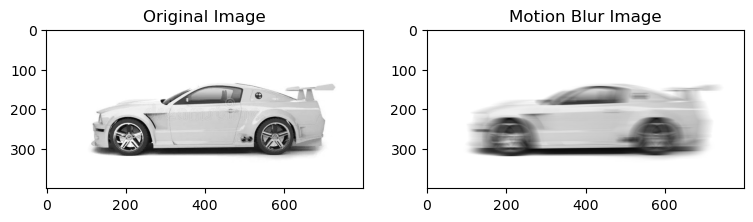

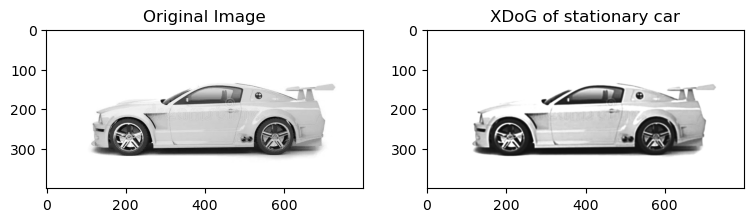

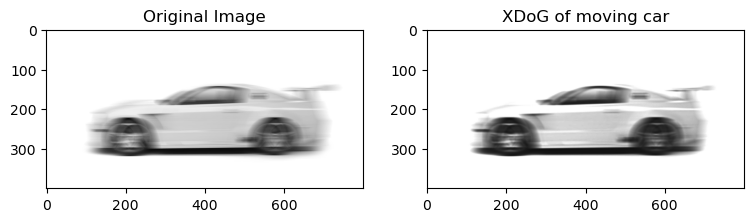

In [61]:
img = cv2.imread("../images/car.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")


# applying motion blur using the motion blur filter
# we make a motion blur kernel with 1's in the direction of the line of motion
blur = hori_motion_blur(img, 40)
plt.subplot(1,2,2)
plt.imshow(blur,cmap = "gray")
plt.title("Motion Blur Image")


#taking xdog now gives us speed lines
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

dog_op = xdog(img,1.6,1.5,1.5,0.9,2)
plt.subplot(1,2,2)
plt.imshow(dog_op,cmap = "gray")
plt.title("XDoG of stationary car")

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(blur, cmap='gray')
plt.title("Original Image")

dog_op = xdog(blur,1.6,1.5,1.5,0.9,2)
plt.subplot(1,2,2)
plt.imshow(dog_op,cmap = "gray")
plt.title("XDoG of moving car")